In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import env

In [7]:
url = env.get_db_url('curriculum_logs')

In [10]:
logs = pd.read_sql('''SELECT * FROM logs JOIN cohorts ON logs.cohort_id = cohorts.id;''', url)

In [60]:
logs = pd.read_csv('logs.csv', index_col=0)

In [61]:
logs

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847325,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
847326,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
847327,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
847328,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2


In [36]:
logs['#' + logs.name.str.lower() != (logs.slack)].groupby('name').mean()

,user_id,cohort_id,id,program_id
name,,,,
Bayes,472.093413,34.0,34.0,3.0
Staff,258.650486,28.0,28.0,2.0


In [31]:
'#' + logs.slack

0         ##hampton
1         ##hampton
2         ##hampton
3         ##hampton
4           ##teddy
            ...    
847325           ##
847326           ##
847327           ##
847328           ##
847329           ##
Name: slack, Length: 847330, dtype: object

In [25]:
logs[['name', 'slack']].value_counts()

name        slack      
Staff       #              84031
Ceres       #ceres         40730
Zion        #zion          38096
Jupiter     #jupiter       37109
Fortuna     #fortuna       36902
Voyageurs   #voyageurs     35636
Ganymede    #ganymede      33844
Apex        #apex          33568
Deimos      #deimos        32888
Darden      #darden        32015
Teddy       #teddy         30926
Hyperion    #hyperion      29855
Betelgeuse  #betelgeuse    29356
Ulysses     #ulysses       28534
Europa      #europa        28033
Xanadu      #xanadu        27749
Bayes       #              26538
Wrangell    #wrangell      25586
Andromeda   #andromeda     25359
Kalypso     #kalypso       23691
Curie       #curie         21582
Yosemite    #yosemite      20743
Bash        #bash          17713
Luna        #luna          16623
Marco       #marco         16397
Easley      #easley        14715
Lassen      #lassen         9587
Arches      #arches         8890
Florence    #florence       8562
Sequoia     #sequoi

In [21]:
logs.slack.value_counts()

#              110569
#ceres          40730
#zion           38096
#jupiter        37109
#fortuna        36902
#voyageurs      35636
#ganymede       33844
#apex           33568
#deimos         32888
#darden         32015
#teddy          30926
#hyperion       29855
#betelgeuse     29356
#ulysses        28534
#europa         28033
#xanadu         27749
#wrangell       25586
#andromeda      25359
#kalypso        23691
#curie          21582
#yosemite       20743
#bash           17713
#luna           16623
#marco          16397
#easley         14715
#lassen          9587
#arches          8890
#florence        8562
#sequoia         7444
#neptune         7276
#olympic         4954
#kings           2845
#pinnacles       2158
#hampton         1712
#oberon          1672
#quincy          1237
#niagara          755
#mammoth          691
#glacier          598
#joshua           302
#ike              253
#badlands          93
#franklin          72
#apollo             5
#denali             4
#everglade

In [37]:
logs.program_id.value_counts()

2    713365
3    103412
1     30548
4         5
Name: program_id, dtype: int64

In [38]:
logs.head(3)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1


In [40]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847330 entries, 0 to 847329
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        847330 non-null  object 
 1   time        847330 non-null  object 
 2   path        847329 non-null  object 
 3   user_id     847330 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          847330 non-null  object 
 6   id          847330 non-null  int64  
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       object 
 14  program_id  847330 non-null  int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 97.0+ MB


In [62]:
logs = logs.drop(columns = ['id', 'created_at', 'updated_at', 'deleted_at'])
logs

,date,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2
...,...,...,...,...,...,...,...,...,...,...,...
847325,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2
847326,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2
847327,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2
847328,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,Staff,#,2014-02-04,2014-02-04,2


In [63]:
logs['date_time'] = pd.to_datetime(logs.date + ' ' + logs.time)
logs

,date,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,date_time
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1,2018-01-26 09:55:03
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:02
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:05
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:06
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2,2018-01-26 09:56:24
...,...,...,...,...,...,...,...,...,...,...,...,...
847325,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2,2021-04-21 16:41:51
847326,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2,2021-04-21 16:42:02
847327,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2,2021-04-21 16:42:09
847328,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,Staff,#,2014-02-04,2014-02-04,2,2021-04-21 16:44:37


In [64]:
logs[['date_time', 'start_date', 'end_date']] = logs[['date_time', 'start_date', 'end_date']].astype('datetime64')

In [65]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847330 entries, 0 to 847329
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        847330 non-null  object        
 1   time        847330 non-null  object        
 2   path        847329 non-null  object        
 3   user_id     847330 non-null  int64         
 4   cohort_id   847330 non-null  float64       
 5   ip          847330 non-null  object        
 6   name        847330 non-null  object        
 7   slack       847330 non-null  object        
 8   start_date  847330 non-null  datetime64[ns]
 9   end_date    847330 non-null  datetime64[ns]
 10  program_id  847330 non-null  int64         
 11  date_time   847330 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2), object(6)
memory usage: 84.0+ MB


In [66]:
logs = logs.set_index('date_time').drop(columns = ['date', 'time'])
logs.head()

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id
date_time,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2


In [72]:
logs.cohort_id = logs.cohort_id.astype('int')

In [75]:
logs = logs.drop(columns='slack')

In [76]:
logs.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
date_time,,,,,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [271]:
logs = logs[(logs.path != '/')
    & (logs.path != 'toc')
    & (logs.path != 'search/search_index.json')]

In [302]:
path_df = logs.path.str.split('/', 2, expand=True)

In [303]:
path_df

,0,1,2
date_time,,,
2018-01-26 09:56:02,java-ii,None,None
2018-01-26 09:56:05,java-ii,object-oriented-programming,None
2018-01-26 09:56:06,slides,object_oriented_programming,None
2018-01-26 09:56:24,javascript-i,conditionals,None
2018-01-26 09:56:41,javascript-i,loops,None
...,...,...,...
2021-04-21 16:41:51,jquery,personal-site,None
2021-04-21 16:42:02,jquery,mapbox-api,None
2021-04-21 16:42:09,jquery,ajax,weather-map


In [304]:
logs = pd.concat([logs, path_df], axis = 1)

In [311]:
logs = logs.rename(columns = {0 : 'main_path'
                      ,1 : 'sub_path'
                      ,2 : 'tertiary_path'})

In [315]:
logs = logs.drop(columns='path')

In [328]:
for x in list(range(1,5)):
    print(f'List of most visited for Program {x}:')
    print()
    print(logs[logs.program_id == x][['main_path', 'sub_path']].value_counts().head())
    print('---------------------')

List of most visited for Program 1:

main_path     sub_path    
spring        fundamentals    1426
content       laravel         1188
              html-css         949
javascript-i  introduction     812
html-css      css-i            752
dtype: int64
---------------------
List of most visited for Program 2:

main_path     sub_path    
spring        fundamentals    32967
html-css      css-i           30838
javascript-i  introduction    23404
html-css      css-ii          19604
javascript-i  bom-and-dom     14960
dtype: int64
---------------------
List of most visited for Program 3:

main_path       sub_path                 
classification  overview                     1785
1-fundamentals  modern-data-scientist.jpg    1655
                AI-ML-DL-timeline.jpg        1651
                1.1-intro-to-data-science    1633
classification  scale_features_or_not.svg    1590
dtype: int64
---------------------
List of most visited for Program 4:

main_path  sub_path
content    html-css    4
d

In [100]:
list(range(1,5))

[1, 2, 3, 4]

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

Continuous probability greater than upper fence

In [330]:
logs[['main_path', 'sub_path']].value_counts().head(10)

main_path     sub_path     
spring        fundamentals     34393
html-css      css-i            31590
javascript-i  introduction     24216
html-css      css-ii           20260
javascript-i  bom-and-dom      15487
jquery        ajax             11964
mysql         relationships    10795
jquery        events           10337
javascript-i  arrays           10147
mysql         clauses           8788
dtype: int64

In [331]:
visits = pd.DataFrame(logs[['main_path', 'sub_path', 'cohort_id']].value_counts().rename('num_visits'))

visits.head(25)

num_visits
main_path    sub_path     cohort_id            
spring       fundamentals 28               3462
html-css     css-i        33               2898
                          51               2256
                          28               2199
spring       fundamentals 29               2185
...                                         ...
                          57               1459
javascript-i introduction 33               1451
html-css     css-i        135              1416
javascript-i introduction 135              1392
spring       fundamentals 26               1381

[25 rows x 1 columns]

In [332]:
visits = visits.reset_index().set_index(['main_path', 'sub_path'])

In [333]:
visits

cohort_id  num_visits
main_path                sub_path                                  
spring                   fundamentals                28        3462
html-css                 css-i                       33        2898
                         css-i                       51        2256
                         css-i                       28        2199
spring                   fundamentals                29        2185
...                                                 ...         ...
professional-development linkedin-tips               61           1
                         job-search-workshop         61           1
                         cover-letter                51           1
prework                  vocab                        7           1
%20https:                                            55           1

[6393 rows x 2 columns]

In [334]:
visits.groupby(['main_path', 'sub_path']).num_visits.quantile(.25).head(10)

main_path       sub_path                 
%20https:                                     1.00
,%20https:                                    1.00
.well-known     assetlinks.json               2.00
1-fundamentals  1-fundamentals-overview       1.00
                1-intro-to-data-science       4.00
                1.1-intro-to-data-science     2.75
                1.2-data-science-pipeline     1.00
                1.3-pipeline-demo             1.00
                2.1-excel-overview           26.00
                2.1-intro-to-excel            2.50
Name: num_visits, dtype: float64

In [335]:
visits = visits.merge(visits.groupby(['main_path', 'sub_path']).num_visits.quantile(.25), on=['main_path', 'sub_path'])

In [336]:
visits.head()

cohort_id  num_visits_x  num_visits_y
main_path sub_path                                           
spring    fundamentals         28          3462         79.25
          fundamentals         29          2185         79.25
          fundamentals         22          1948         79.25
          fundamentals         62          1770         79.25
          fundamentals         31          1757         79.25

In [337]:
visits = visits.merge(visits.groupby(['main_path', 'sub_path']).num_visits_x.quantile(.75), on=['main_path', 'sub_path'])

In [338]:
visits

cohort_id  num_visits_x_x  \
main_path                sub_path                                              
spring                   fundamentals                     28            3462   
                         fundamentals                     29            2185   
                         fundamentals                     22            1948   
                         fundamentals                     62            1770   
                         fundamentals                     31            1757   
...                                                      ...             ...   
python                   custom-sorting-functions         59               1   
professional-development professional-resume              61               1   
                         job-search-workshop              61               1   
                         cover-letter                     51               1   
%20https:                                                 55               1   

                                                   num_visits_y  \
main_path                sub_path                                 
spring                   fundamentals                     79.25   
                         fundamentals                     79.25   
                         fundamentals                     79.25   
                         fundamentals                     79.25   
                         fundamentals                     79.25   
...                                                         ...   
python                   custom-sorting-functions          1.00   
professional-development professional-resume               1.00   
                         job-search-workshop               1.00   
                         cover-letter                      1.00   
%20https:                                                  1.00   

                                                   num_visits_x_y  
main_path                sub_path                                  
spring                   fundamentals                     1601.25  
                         fundamentals                     1601.25  
                         fundamentals                     1601.25  
                         fundamentals                     1601.25  
                         fundamentals                     1601.25  
...                                                           ...  
python                   custom-sorting-functions            1.00  
professional-development professional-resume                 1.00  
                         job-search-workshop                 1.00  
                         cover-letter                        1.00  
%20https:                                                    1.00  

[6393 rows x 4 columns]

In [339]:
visits = visits.rename(columns={'num_visits_x_x': 'num_visits'
                                ,'num_visits_y' : 'q1'
                                ,'num_visits_x_y': 'q3'})

In [340]:
visits

cohort_id  num_visits  \
main_path                sub_path                                          
spring                   fundamentals                     28        3462   
                         fundamentals                     29        2185   
                         fundamentals                     22        1948   
                         fundamentals                     62        1770   
                         fundamentals                     31        1757   
...                                                      ...         ...   
python                   custom-sorting-functions         59           1   
professional-development professional-resume              61           1   
                         job-search-workshop              61           1   
                         cover-letter                     51           1   
%20https:                                                 55           1   

                                                      q1       q3  
main_path                sub_path                                  
spring                   fundamentals              79.25  1601.25  
                         fundamentals              79.25  1601.25  
                         fundamentals              79.25  1601.25  
                         fundamentals              79.25  1601.25  
                         fundamentals              79.25  1601.25  
...                                                  ...      ...  
python                   custom-sorting-functions   1.00     1.00  
professional-development professional-resume        1.00     1.00  
                         job-search-workshop        1.00     1.00  
                         cover-letter               1.00     1.00  
%20https:                                           1.00     1.00  

[6393 rows x 4 columns]

In [341]:
visits['upper_fence'] = visits.q3 + ( 3 * (visits.q3 - visits.q1))

In [342]:
visits['upper_fence_5'] = visits.q3 + ( 5 * (visits.q3 - visits.q1))

In [250]:
pd.set_option('display.max_rows', 10)

In [343]:
visits

cohort_id  num_visits  \
main_path                sub_path                                          
spring                   fundamentals                     28        3462   
                         fundamentals                     29        2185   
                         fundamentals                     22        1948   
                         fundamentals                     62        1770   
                         fundamentals                     31        1757   
...                                                      ...         ...   
python                   custom-sorting-functions         59           1   
professional-development professional-resume              61           1   
                         job-search-workshop              61           1   
                         cover-letter                     51           1   
%20https:                                                 55           1   

                                                      q1       q3  \
main_path                sub_path                                   
spring                   fundamentals              79.25  1601.25   
                         fundamentals              79.25  1601.25   
                         fundamentals              79.25  1601.25   
                         fundamentals              79.25  1601.25   
                         fundamentals              79.25  1601.25   
...                                                  ...      ...   
python                   custom-sorting-functions   1.00     1.00   
professional-development professional-resume        1.00     1.00   
                         job-search-workshop        1.00     1.00   
                         cover-letter               1.00     1.00   
%20https:                                           1.00     1.00   

                                                   upper_fence  upper_fence_5  
main_path                sub_path                                              
spring                   fundamentals                  6167.25        9211.25  
                         fundamentals                  6167.25        9211.25  
                         fundamentals                  6167.25        9211.25  
                         fundamentals                  6167.25        9211.25  
                         fundamentals                  6167.25        9211.25  
...                                                        ...            ...  
python                   custom-sorting-functions         1.00           1.00  
professional-development professional-resume              1.00           1.00  
                         job-search-workshop              1.00           1.00  
                         cover-letter                     1.00           1.00  
%20https:                                                 1.00           1.00  

[6393 rows x 6 columns]

In [357]:
pd.set_option('display.max_rows', 10)

In [358]:
visits[visits.num_visits > visits.upper_fence_5].sort_values('cohort_id')

cohort_id  num_visits    q1     q3  \
main_path      sub_path                                                
content        php_iv                    13         273  11.0  35.00   
               javascript_ii             13          81   7.0  12.00   
               javascript                13         176   5.5  28.50   
               php_iii                   13         188   5.5  34.75   
               git                       14         157   5.0  30.00   
...                                     ...         ...   ...    ...   
distributed-ml overview                  59          65   2.0  12.00   
nlp            project                   59         131   8.0  24.00   
css-ii         media-queries             62           2   1.0   1.00   
appendix       coding-challenges         62         124   2.0  18.00   
jquery         mapbox-api               135          87   4.0  12.00   

                                  upper_fence  upper_fence_5  
main_path      sub_path                                       
content        php_iv                   107.0          155.0  
               javascript_ii             27.0           37.0  
               javascript                97.5          143.5  
               php_iii                  122.5          181.0  
               git                      105.0          155.0  
...                                       ...            ...  
distributed-ml overview                  42.0           62.0  
nlp            project                   72.0          104.0  
css-ii         media-queries              1.0            1.0  
appendix       coding-challenges         66.0           98.0  
jquery         mapbox-api                36.0           52.0  

[93 rows x 6 columns]

In [346]:
pd.set_option('display.max_rows', None)

In [353]:
visits[visits.num_visits > visits.upper_fence_5].sort_values(['cohort_id', 'num_visits'], ascending = [True, False])

cohort_id  num_visits     q1  \
main_path       sub_path                                                        
content         php_iv                                  13         273  11.00   
                php_iii                                 13         188   5.50   
                javascript                              13         176   5.50   
                javascript_ii                           13          81   7.00   
                git                                     14         157   5.00   
                javascript                              14         153   5.50   
                javascript_ii                           14          66   7.00   
                gitbook                                 14           8   1.00   
                javascript_ii                           17          55   7.00   
mkdocs          search_index.json                       22         595   1.75   
javascript-i    google-maps-api                         22         187   9.00   
slides          servlets                                22         128   2.00   
                jsp_and_jstl                            22         119   1.00   
                jdbc                                    22         115   2.00   
                syntax_types_and_variables              22         113   2.00   
                arrays                                  22         113   2.25   
                collections                             22         108   1.25   
                introduction_to_java                    22         100   3.00   
                mvc                                     22          96   2.00   
                deployment_and_dependencies             22          94   1.00   
                inheritance_and_polymorphism            22          84   2.00   
                object_oriented_programming             22          81   2.00   
                console_io                              22          80   2.00   
                interfaces_and_abstract_classes         22          80   2.00   
                file_io                                 22          80   2.00   
                control_statements_and_loops            22          80   1.00   
                sessions_and_cookies                    22          80   1.00   
                user_input                              22          77   1.00   
                methods                                 22          72   1.00   
                exceptions_and_error_handling           22          71   2.00   
                annotations                             22          64   3.00   
                strings                                 22          57   1.75   
                passwords                               22          47   1.00   
mkdocs          search_index.json                       23         721   1.75   
javascript-i    google-maps-api                         23         219   9.00   
slides          jsp_and_jstl                            23         125   1.00   
                jdbc                                    23         111   2.00   
                arrays                                  23         105   2.25   
                syntax_types_and_variables              23          96   2.00   
                user_input                              23          94   1.00   
                methods                                 23          94   1.00   
                object_oriented_programming             23          89   2.00   
                inheritance_and_polymorphism            23          86   2.00   
                deployment_and_dependencies             23          79   1.00   
                servlets                                23          77   2.00   
                introduction_to_java                    23          77   3.00   
                sessions_and_cookies                    23          76   1.00   
                collections                             23          74   1.25   

In [361]:
logs.main_path.unique()

array(['java-ii', 'slides', 'javascript-i', 'mkdocs', 'git', 'spring',
       'appendix', 'index.html', 'java-i', 'html-css', 'examples',
       'javascript', 'mysql', 'content', 'jquery', 'java',
       'javascript-ii', 'teams', 'java-iii', 'prework', 'asdf', 'css',
       'single-page.html', 'home', 'assets', 'forms', 'css-i',
       'alumni-tech-survey-2018', 'alumni-tech-survey-2018.html', 'es6',
       'introduction-to-java', 'strings', 'methods', 'introduction',
       'elements', 'file-io', 'css-ii', 'functions',
       'javascript-with-html', 'conditionals', 'bom-and-dom', 'mvc',
       'students', 'fundamentals', 'setup', 'group-by',
       'finish-the-adlister', 'essential-methods', 'uploads', 'ajax',
       'student', 'hfdgafdja', 'php', '.git', '.gitignore', 'wp-admin',
       'wp-login', 'registerUser', 'pre-work', 'learn-to-code',
       'capstone-workbook', 'jsp-and-jstl', 'html', 'handouts',
       'javascript-functions', 'login', 'quize', 'cohorts', 'PreWork',
       '

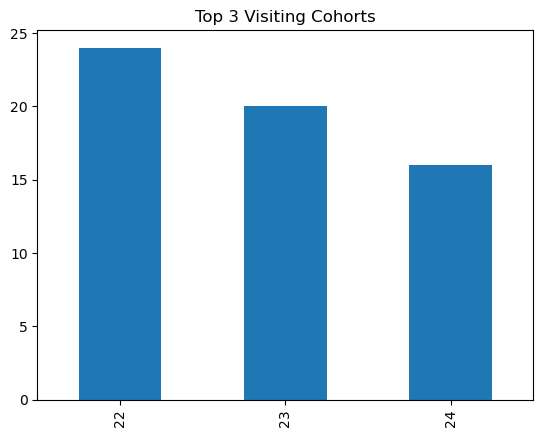

In [354]:
visits[visits.num_visits > visits.upper_fence_5].cohort_id.value_counts().head(3).plot.bar()
plt.title('Top 3 Visiting Cohorts');

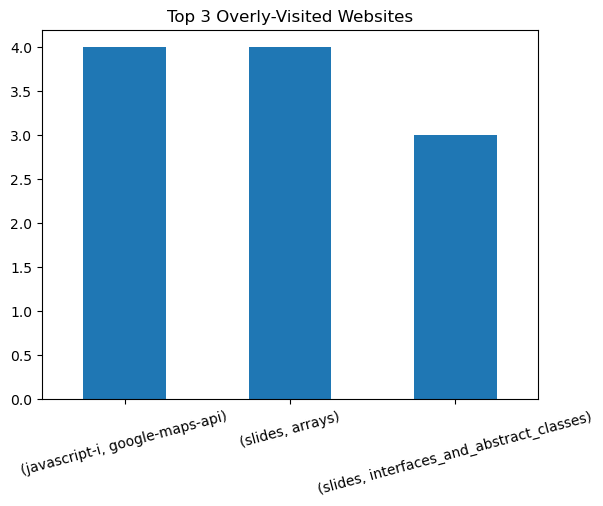

In [362]:
visits[visits.num_visits > visits.upper_fence_5].index.value_counts().head(3).plot.bar()
plt.title('Top 3 Overly-Visited Websites')
plt.xticks(rotation=15);

In [ ]:
keep the path intact

do conditional probabilities for each cohort within each program for each path

3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [ ]:
filter between start and stop == datetime stamp

value counts of user id (if necessary, group by program id)

4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [ ]:
IP addresses, value_counts and conditional probabilities

5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

**Data Science is program id 3**

In [119]:
logs[logs.name == 'Bayes'].path.value_counts().sort_values()

fundamentals/cli/overview                      1
overview                                       1
cli/moving-files                               1
AnomalyDetectionCartoon.jpeg                   1
acquire-and-prep                               1
                                            ... 
search/search_index.json                     588
1-fundamentals/1.1-intro-to-data-science     640
1-fundamentals/AI-ML-DL-timeline.jpg         648
1-fundamentals/modern-data-scientist.jpg     650
/                                           1967
Name: path, Length: 533, dtype: int64

6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

After splitting the filepaths into a main, sub, and tertiary paths, we can see a somewhat general overview as to what main topics are generally accessed after graduation.

In [367]:
# Applying boolean mask to apply access dates that are after cohort end dates. Then looking at counts of main_paths
# to get that overview.

logs[logs.index > logs.end_date].groupby('main_path').count().sort_values('user_id', ascending=False).head()

,user_id,cohort_id,ip,name,start_date,end_date,program_id,sub_path,tertiary_path
main_path,,,,,,,,,
javascript-i,19150,19150,19150,19150,19150,19150,19150,14181,6083
spring,17529,17529,17529,17529,17529,17529,17529,13256,11514
html-css,14496,14496,14496,14496,14496,14496,14496,10809,6945
mysql,13787,13787,13787,13787,13787,13787,13787,11198,2687
java-iii,11466,11466,11466,11466,11466,11466,11466,7925,540


Generally speaking, students look most at javascript-i, spring, and html-css topics after graduation.

Now we'll look on a slightly more granular level.

In [366]:
logs[logs.index > logs.end_date].groupby(['main_path', 'sub_path']).count().sort_values('user_id', ascending=False)

user_id  cohort_id     ip  \
main_path         sub_path                                                     
spring            fundamentals                       10288      10288  10288   
html-css          css-i                               4937       4937   4937   
javascript-i      introduction                        3285       3285   3285   
jquery            ajax                                2689       2689   2689   
html-css          css-ii                              2589       2589   2589   
...                                                    ...        ...    ...   
appendix          interview_questions_instructors        1          1      1   
12-distributed-ml topic-modeling                         1          1      1   
                  read-jdbc                              1          1      1   
php_i             gitbook                                1          1      1   
appendix          professional                           1          1      1   

                                                    name  start_date  \
main_path         sub_path                                             
spring            fundamentals                     10288       10288   
html-css          css-i                             4937        4937   
javascript-i      introduction                      3285        3285   
jquery            ajax                              2689        2689   
html-css          css-ii                            2589        2589   
...                                                  ...         ...   
appendix          interview_questions_instructors      1           1   
12-distributed-ml topic-modeling                       1           1   
                  read-jdbc                            1           1   
php_i             gitbook                              1           1   
appendix          professional                         1           1   

                                                   end_date  program_id  \
main_path         sub_path                                                
spring            fundamentals                        10288       10288   
html-css          css-i                                4937        4937   
javascript-i      introduction                         3285        3285   
jquery            ajax                                 2689        2689   
html-css          css-ii                               2589        2589   
...                                                     ...         ...   
appendix          interview_questions_instructors         1           1   
12-distributed-ml topic-modeling                          1           1   
                  read-jdbc                               1           1   
php_i             gitbook                                 1           1   
appendix          professional                            1           1   

                                                   tertiary_path  
main_path         sub_path                                        
spring            fundamentals                             10285  
html-css          css-i                                     4608  
javascript-i      introduction                              2730  
jquery            ajax                                      2193  
html-css          css-ii                                    2336  
...                                                          ...  
appendix          interview_questions_instructors              0  
12-distributed-ml topic-modeling                               0  
                  read-jdbc                                    0  
php_i             gitbook                                      1  
appendix          professional                                 0  

[837 rows x 8 columns]

In [365]:
logs[logs.index > logs.end_date].groupby('sub_path').count().sort_values('user_id', ascending=False)

,user_id,cohort_id,ip,name,start_date,end_date,program_id,main_path,tertiary_path
sub_path,,,,,,,,,
fundamentals,10305,10305,10305,10305,10305,10305,10305,10305,10290
introduction,5894,5894,5894,5894,5894,5894,5894,5894,2731
css-i,4937,4937,4937,4937,4937,4937,4937,4937,4608
ajax,2689,2689,2689,2689,2689,2689,2689,2689,2193
css-ii,2589,2589,2589,2589,2589,2589,2589,2589,2336
...,...,...,...,...,...,...,...,...,...
creating-custom-fields.md,1,1,1,1,1,1,1,1,0
review,1,1,1,1,1,1,1,1,0
requests-and-responses,1,1,1,1,1,1,1,1,0


In [ ]:
filter datettime > enddate, parsing out filepaths, groupby program id, valuecounts of paths

7. Which lessons are least accessed?

In [246]:
pd.set_option('display.max_rows', None)

In [248]:
logs.path.value_counts().sort_values(ascending=True).to_markdown()

"|                                                                                                                                                                                                                                                                                                                        |   path |\n|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------:|\n| appendix/professional-development/post-interview-review-form                                                                                                                                                                                                                                                           |      1 |\n| html-css/elecments    

8. Anything else I should be aware of?